# Movie Recommander System - DataMining project

## Data cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
df = pd.read_csv('movies_metadata.csv')

# keep only the small dataset
links_small = pd.read_csv('links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

df = df.drop([19730, 29503, 35587])
df['id'] = df['id'].astype('int')

df = df[df['id'].isin(links_small)]
df.shape

<ipython-input-2-7e89d27b27ee>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


(9099, 24)

In [ ]:
df.to_csv("movies_metadata_small.csv")
df.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [ ]:
df = df.drop(['imdb_id'], axis=1)

In [ ]:
df[df['original_title'] != df['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
57,The Postman,Il postino
58,The Confessional,Le confessionnal
67,French Twist,Gazon maudit


In [ ]:
df = df.drop('original_title', axis=1)

In [ ]:
print(df[df['revenue'] == 0].shape)
df['revenue'] = df['revenue'].replace(0, np.nan)

(4330, 22)


majority of the movies have a recorded revenue of 0.

In [ ]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(4453, 22)

same with budget

In [ ]:
# A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(5247, 23)

In [ ]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [ ]:
df['adult'].value_counts()

False    9099
Name: adult, dtype: int64

all false

In [ ]:
df = df.drop('adult', axis=1)

## EDA

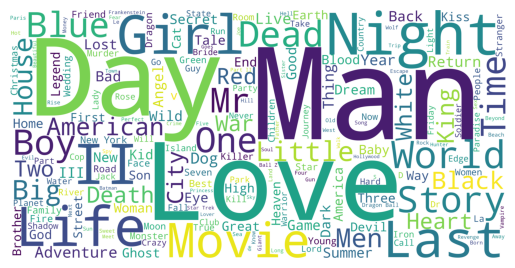

In [ ]:
from wordcloud import WordCloud, STOPWORDS

df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure()
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

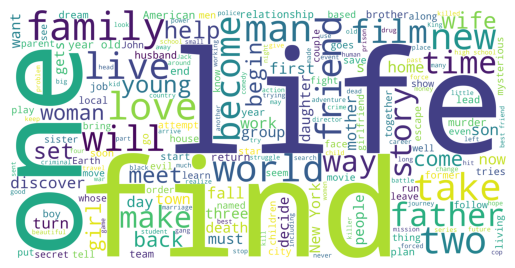

In [ ]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure()
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
import ast

df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'


<ipython-input-15-57def3f86f9d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)


In [ ]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,6853,United States of America
1,1206,United Kingdom
2,704,France
3,545,Germany
4,359,Canada
5,289,Japan
6,260,Italy
7,166,Australia
8,125,Spain
9,97,Hong Kong


In [ ]:
con_df = con_df[con_df['country'] != 'United States of America']

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

 United States is the most popular destination of production for movies given that our dataset largely consists of English movies. Europe is also an extremely popular location with the UK, France, Germany and Italy in the top 5. Japan and India are the most popular Asian countries when it comes to movie production.

In [ ]:
len(df[df['belongs_to_collection'].notnull()])

1674

In [ ]:
# companies
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

com_df = df.drop('production_companies', axis=1).join(s)

com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

com_pivot.sort_values('Total', ascending=False).head(10)

<ipython-input-19-6da720229c0e>:5: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



,Total,Average,Number
companies,,,
Warner Bros.,5.801611e+10,1.378055e+08,421
Universal Pictures,4.986652e+10,1.272105e+08,392
Paramount Pictures,4.543991e+10,1.340410e+08,339
Twentieth Century Fox Film Corporation,4.500408e+10,1.495152e+08,301
Walt Disney Pictures,3.324759e+10,2.747734e+08,121
Columbia Pictures,3.005545e+10,1.438060e+08,209
New Line Cinema,2.119871e+10,1.190939e+08,178
Amblin Entertainment,1.694371e+10,2.647455e+08,64
DreamWorks SKG,1.503943e+10,2.118230e+08,71


In [ ]:
df['original_language'].drop_duplicates().shape[0]

lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,7955,en
fr,274,fr
ja,188,ja
de,114,de
it,98,it


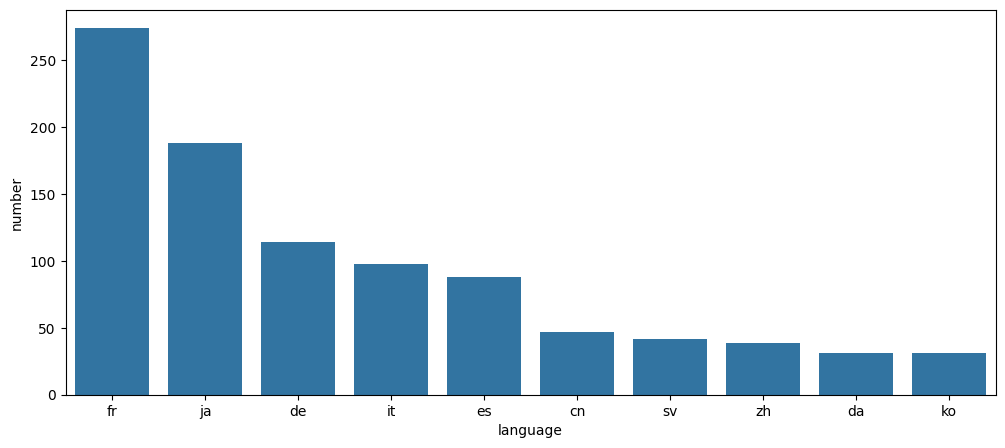

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

In [ ]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

<Axes: ylabel='Frequency'>

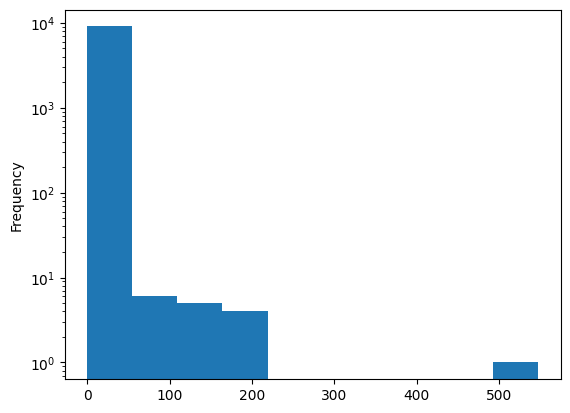

In [ ]:
df['popularity'].plot(logy=True, kind='hist')

In [ ]:
# most popular
df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014
24873,The Hunger Games: Mockingjay - Part 1,147.098006,2014
26567,Captain America: Civil War,145.882135,2016
292,Pulp Fiction,140.950236,1994
12481,The Dark Knight,123.167259,2008


In [ ]:
# most vote count
df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


<ipython-input-26-b55baecc7150>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='vote_average', ylabel='Density'>

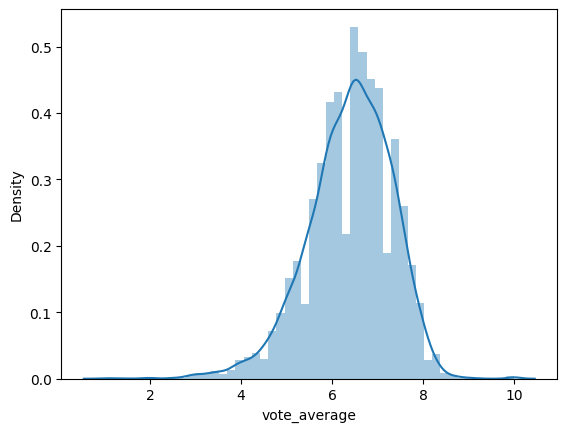

In [ ]:
# vote average
df['vote_average'] = df['vote_average'].replace(0, np.nan)
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

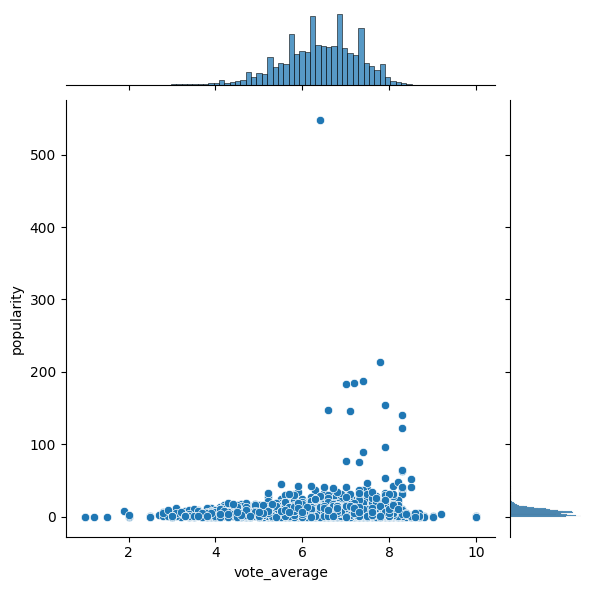

In [ ]:
sns.jointplot(x='vote_average', y='popularity', data=df)

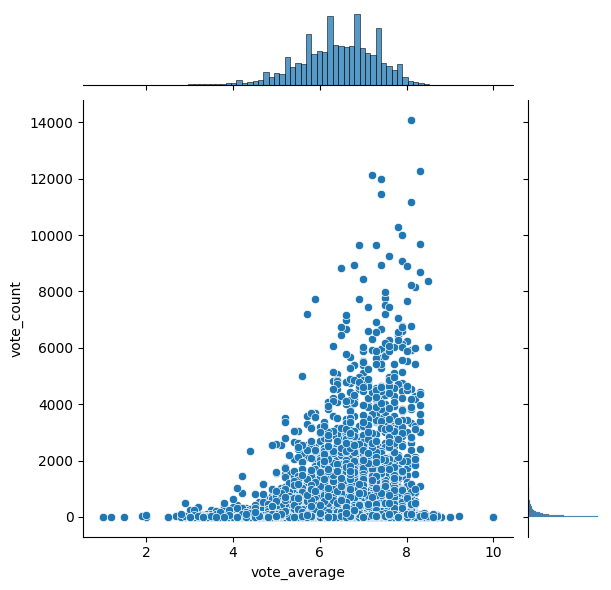

In [ ]:
sns.jointplot(x='vote_average', y='vote_count', data=df)

<Axes: title={'center': 'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

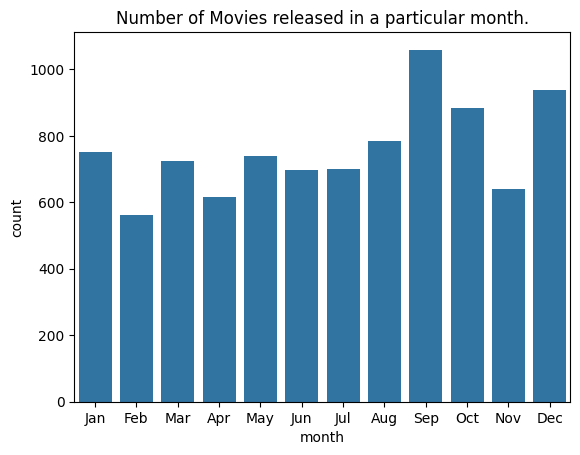

In [ ]:
import datetime

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

plt.figure()
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

<Axes: title={'center': 'Number of Movies released in a particular day.'}, xlabel='day', ylabel='count'>

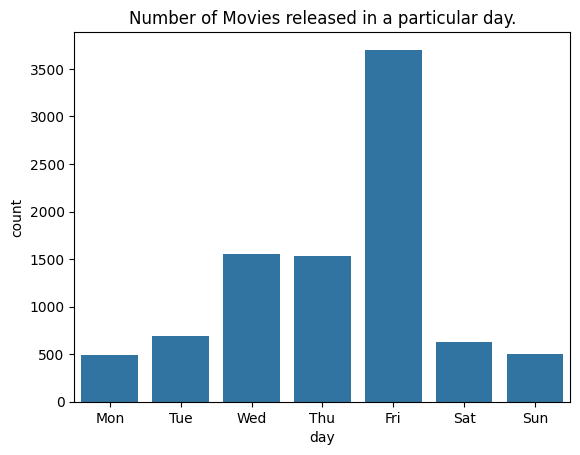

In [ ]:
plt.figure()
plt.title("Number of Movies released in a particular day.")
sns.countplot(x='day', data=df, order=day_order)

<Axes: xlabel='year'>

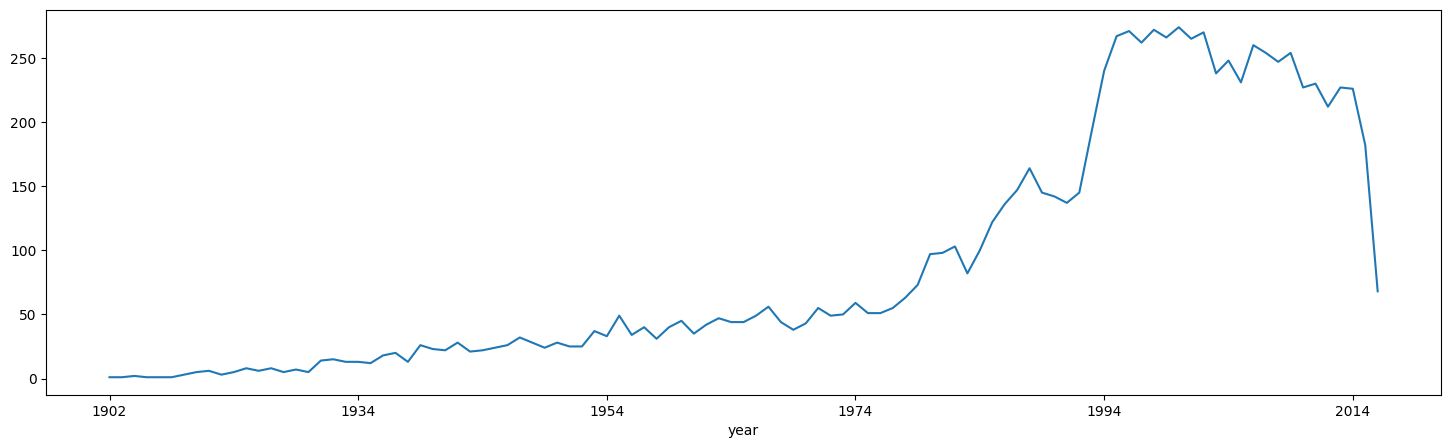

In [ ]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

In [ ]:
df['status'].value_counts()

Released           9078
Rumored              11
Post Production       7
In Production         1
Name: status, dtype: int64

In [ ]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)
df['spoken_languages'].value_counts()

1     6527
2     1515
3      587
4      211
0      139
5       78
6       30
7        7
8        3
12       1
9        1
Name: spoken_languages, dtype: int64

Most movies have just one language spoken in the entire duration of the film. 19 is the higest number of languages spoken in a film

<ipython-input-34-580c3e28e4e6>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='runtime', ylabel='Density'>

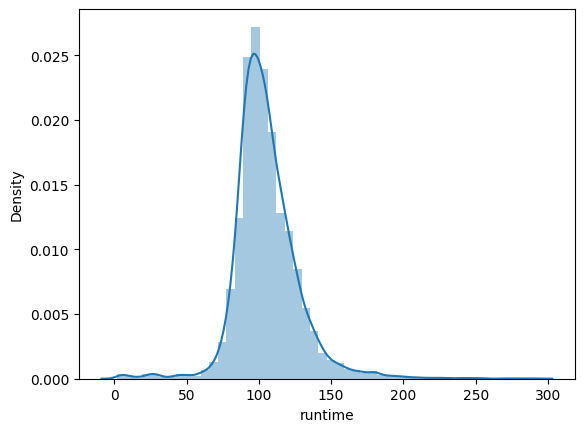

In [ ]:
df['runtime'] = df['runtime'].astype('float')

plt.figure()
sns.distplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'])

<Axes: ylabel='Frequency'>

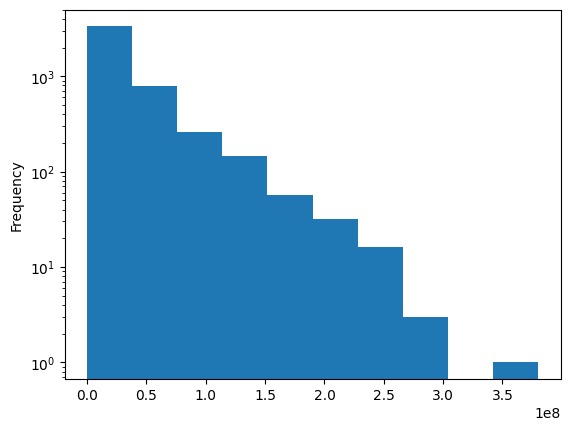

In [ ]:
df['budget'].plot(logy=True, kind='hist')

<ipython-input-36-09485d7f61f1>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='revenue', ylabel='Density'>

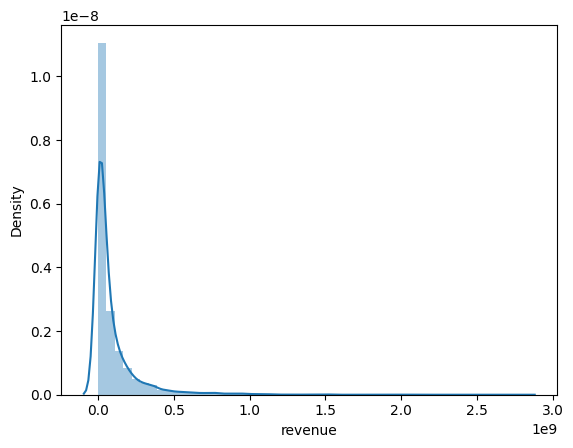

In [ ]:
sns.distplot(df[df['revenue'].notnull()]['revenue'])

In [ ]:
df['year'] = df['year'].replace('NaT', np.nan)
df['year'] = df['year'].apply(clean_numeric)

<ipython-input-38-c8c3e5014b49>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



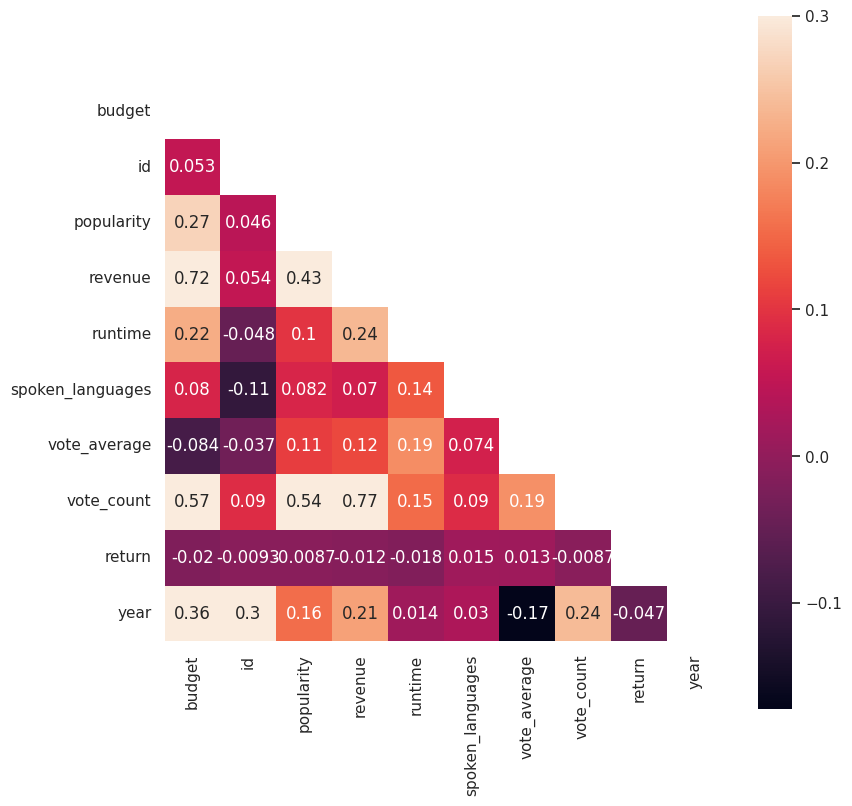

In [ ]:
sns.set(font_scale=1)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

In [ ]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

gen_df = df.drop('genres', axis=1).join(s)
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

<ipython-input-39-fd177b89c840>:3: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



,genre,movies
0,Drama,4659
1,Comedy,3379
2,Thriller,2019
3,Romance,1852
4,Action,1755
5,Crime,1257
6,Adventure,1201
7,Horror,918
8,Science Fiction,862
9,Family,861


## Feature engineering

In [ ]:
df.head().transpose()

,0,1,2,3,4
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000.0,65000000.0,NaN,16000000.0,NaN
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy]
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
original_language,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519
poster_path,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,/e64sOI48hQXyru7naBFyssKFxVd.jpg
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Co...","[Warner Bros., Lancaster Gate]",[Twentieth Century Fox Film Corporation],"[Sandollar Productions, Touchstone Pictures]"


In [ ]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_rgf = df.drop('genres', axis=1).join(s)
genres_train = gen_rgf['genre'].drop_duplicates()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

<ipython-input-41-6dbf206ca24b>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [ ]:
def feature_engineering(df):
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == np.nan else 1)
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))
    df['homepage'] = df['homepage'].apply(lambda x: 0 if x == np.nan else 1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language', axis=1)
    df = df.drop('overview', axis=1)
    df = df.drop('poster_path', axis=1)
    for comp in ['Warner Bros','Universal Pictures','Paramount Pictures',	'Twentieth Century Fox Film Corporation']:
        df['is_' + str(comp)] = df['production_companies'].apply(lambda x: 1 if comp in x else 0)
    for country in ['United States of America','United Kingdom']:
        df['is_' + str(country)] = df['production_countries'].apply(lambda x: 1 if country in x else 0)
    df = df.drop(['production_companies','production_countries'], axis=1)
    df = df.drop('release_date', axis=1)
    df = df.drop('status', axis=1)
    df = df.drop('tagline', axis=1)
    df = df.drop('title', axis=1)
    df = df.drop('video', axis=1)
#    df = pd.get_dummies(df, prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    for day in day_order:
        df['is_' + str(day)] = df['day'].apply(lambda x: 1 if day in x else 0)
    for month in month_order:
        df['is_' + str(month)] = df['month'].apply(lambda x: 1 if month in x else 0)
    df = df.drop(['day','month'], axis=1)
    return df

data = df.copy()
clean_df = feature_engineering(data)
clean_df.head().transpose()

,0,1,2,3,4
belongs_to_collection,1.000000e+00,1.000000e+00,1.0000,1.000000e+00,1.000000e+00
budget,3.000000e+07,6.500000e+07,NaN,1.600000e+07,NaN
genres,3.000000e+00,3.000000e+00,2.0000,3.000000e+00,1.000000e+00
homepage,1.000000e+00,1.000000e+00,1.0000,1.000000e+00,1.000000e+00
id,8.620000e+02,8.844000e+03,15602.0000,3.135700e+04,1.186200e+04
popularity,2.194694e+01,1.701554e+01,11.7129,3.859495e+00,8.387519e+00
revenue,3.735540e+08,2.627972e+08,NaN,8.145216e+07,7.657891e+07
runtime,8.100000e+01,1.040000e+02,101.0000,1.270000e+02,1.060000e+02
spoken_languages,1.000000e+00,2.000000e+00,1.0000,1.000000e+00,1.000000e+00
vote_average,7.700000e+00,6.900000e+00,6.5000,6.100000e+00,5.700000e+00


### credit dataset

In [ ]:
credits = pd.read_csv('credits.csv')
#clean_df = pd.read_csv('cleaned_meta_data.csv')

credits['id'] = credits['id'].astype('int')
clean_df['id'] = clean_df['id'].astype('int')

In [ ]:
from ast import literal_eval

clean_df = clean_df.merge(credits, on='id')

clean_df['cast'] = clean_df ['cast'].apply(literal_eval)
clean_df ['crew'] = clean_df ['crew'].apply(literal_eval)
clean_df ['cast_size'] = clean_df ['cast'].apply(lambda x: len(x))
clean_df ['crew_size'] = clean_df ['crew'].apply(lambda x: len(x))

In [ ]:
clean_df = clean_df.drop(['Unnamed: 0','cast','crew'],axis = 1)
clean_df.head().transpose()

,0,1,2,3,4
belongs_to_collection,1.0,1.0,1.0,1.0,1.0
budget,30000000.0,65000000.0,NaN,16000000.0,NaN
genres,3.0,3.0,2.0,3.0,1.0
homepage,1.0,1.0,1.0,1.0,1.0
id,862.0,8844.0,15602.0,31357.0,11862.0
...,...,...,...,...,...
is_Oct,1.0,0.0,0.0,0.0,0.0
is_Nov,0.0,0.0,0.0,0.0,0.0
is_Dec,0.0,1.0,1.0,1.0,0.0
cast_size,13.0,26.0,7.0,10.0,12.0


In [ ]:
clean_df.to_csv('cleaned_meta_data.csv')

## Demension Reduction

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'cleaned_meta_data.csv'
data = pd.read_csv(file_path)
ids = data['id']
data = data.drop(["Unnamed: 0","id"],axis=1)
print(len(data))

# Display the first few rows of the dataset to understand its structure
data.head()

9133


,belongs_to_collection,budget,genres,homepage,popularity,revenue,runtime,spoken_languages,vote_average,vote_count,...,is_May,is_Jun,is_Jul,is_Aug,is_Sep,is_Oct,is_Nov,is_Dec,cast_size,crew_size
0,1,30000000.0,3,1,21.946943,373554033.0,81.0,1,7.7,5415.0,...,0,0,0,0,0,1,0,0,13,106
1,1,65000000.0,3,1,17.015539,262797249.0,104.0,2,6.9,2413.0,...,0,0,0,0,0,0,0,1,26,16
2,1,NaN,2,1,11.712900,NaN,101.0,1,6.5,92.0,...,0,0,0,0,0,0,0,1,7,4
3,1,16000000.0,3,1,3.859495,81452156.0,127.0,1,6.1,34.0,...,0,0,0,0,0,0,0,1,10,10
4,1,NaN,1,1,8.387519,76578911.0,106.0,1,5.7,173.0,...,0,0,0,0,0,0,0,0,12,7


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values with the median for numerical columns
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data)

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Check the shape of the processed data
data_scaled.shape

(9133, 61)

### PCA

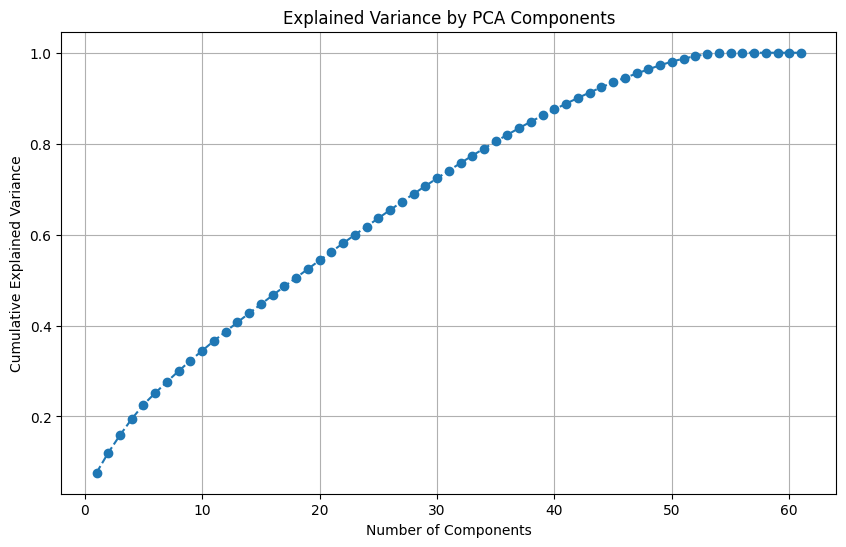

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA
pca = PCA().fit(data_scaled)

# Plotting the explained variance ratio of the PCA components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Displaying the cumulative explained variance by the first few components
cumulative_variance = pca.explained_variance_ratio_.cumsum()
cumulative_variance[:20]  # Displaying the first 20 components for brevity

array([0.07623299, 0.12004025, 0.15892754, 0.19450863, 0.22602861,
       0.25156173, 0.27634506, 0.30000779, 0.32301917, 0.34469423,
       0.36619911, 0.38669124, 0.407063  , 0.42702035, 0.44685643,
       0.46647659, 0.48588111, 0.50514736, 0.52430009, 0.54332125])

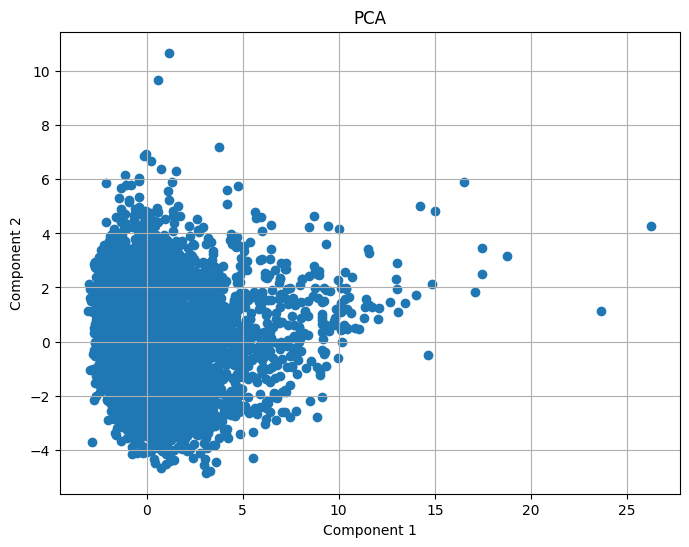

In [ ]:
pca_results= pca.fit_transform(data_scaled)

# Plotting PCA Component 1 vs Component 2
plt.figure(figsize=(8, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1])
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

The PCA analysis reveals that the cumulative explained variance increases with the number of components, as expected. The first 20 components capture approximately 54.3% of the total variance in the dataset. This indicates that while PCA reduces dimensionality, a significant number of components are required to capture most of the variance due to the dataset's complexity.

Given this, PCA suggests that while we can reduce the dimensionality, the reduction is not extremely efficient if we aim to retain a high level of detail in the data. For tasks requiring a high level of data fidelity, this might necessitate retaining a relatively large number of components.

### t-SNE

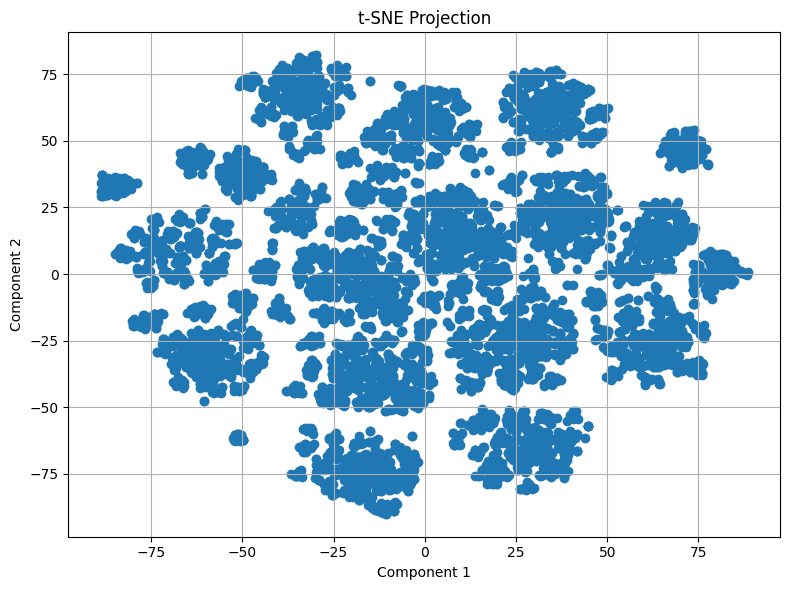

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_scaled)

# t-SNE plot
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('t-SNE Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

### Umap

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


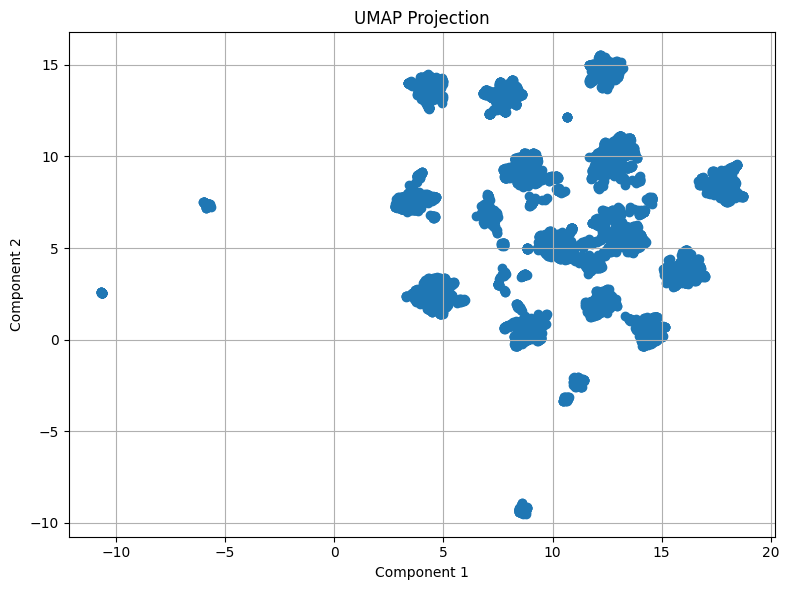

In [ ]:
! pip install umap-learn
from umap import UMAP

# Applying UMAP
umap = UMAP(n_components=2, random_state=42)
umap_results = umap.fit_transform(data_scaled)

# UMAP plot
plt.figure(figsize=(8, 6))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.title('UMAP Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Combine the UMAP results with the 'id' column
umap_df = pd.DataFrame(umap_results, columns=['UMAP Component 1', 'UMAP Component 2'])
umap_df['id'] = ids.values
umap_df.head()
umap_df.to_csv("umap_df.csv")